## Hotel Reviews Sentiment Analysis
    In Hotel Reviews Sentiment Analysis we have the Reviews according to the hotel.People prefer to book such hotels which have high number of positive reviews. Here we analyse the dataset on the he performance of these algorithms are assessed on two different parametersettings. The reviews are classified as “positive”,“negative” or “average” labels. 

Download this dataset from below link :https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

## Importing Library

In [1]:
import numpy as np
import pandas as pd             #Importing essential libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Data set

In [2]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

## Show Dataset

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Size of Dataset

In [4]:
df.shape

(20491, 2)

### Examine the Dataset

In [5]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### Data Preprocessing

In [8]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

# Cleaning and Analysis

In [9]:
df["Rating"].value_counts()      #checking the values of ratings 

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [10]:
df_neg = df.loc[df["Rating"] < 3]
df_neg = df_neg.reset_index(drop = True)    #dividing the data set into two 

In [11]:
df_pos = df.loc[df["Rating"] >=3]
df_pos = df_pos.reset_index(drop = True)

In [12]:
df_pos = df_pos.loc[:len(df_neg)]  #making the data set balanced enough

In [13]:
len(df_pos)

3215

In [14]:
len(df_neg)

3214

In [15]:
df_all = pd.concat([df_neg,df_pos], axis=0)
df_all = df_all.reset_index(drop = True)

In [16]:
len(df_all)

6429

# Creating a Sentiments Column

In [17]:
df_all["Sentiments"] = np.where(df_all["Rating"] >= 3,"Positive","Negative")

In [18]:
df_all.head()       # Checking if the data got correct sentiments column

,Review,Rating,Sentiments
0,ok nothing special charge diamond member hilto...,2,Negative
1,"poor value stayed monaco seattle july, nice ho...",2,Negative
2,horrible customer service hotel stay february ...,1,Negative
3,disappointed say anticipating stay hotel monac...,2,Negative
4,great location need internally upgrade advanta...,2,Negative


In [19]:
df_all.tail()       # Checking if the data got correct sentiments column

,Review,Rating,Sentiments
6424,small good price overall hotel clean areas hot...,3,Positive
6425,great place short stay stayed nights attend we...,4,Positive
6426,nice hotel good location family stayed hotel n...,4,Positive
6427,clean no frills holiday inn express condado ar...,3,Positive
6428,great location stayed saturday night prior cru...,5,Positive


In [20]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)   #randomizing the data set

In [22]:
df_all.head(10)          #Checking of the randomizing worked correctly

,Review,Rating,Sentiments
0,run away stay safer staff okay long tipped rea...,1,Negative
1,small expensive room given small small people ...,1,Negative
2,nice place town couple days wanted stay downto...,4,Positive
3,beware budget means dirty no hot water unfrien...,1,Negative
4,superb location superb people really not beat ...,5,Positive
5,"fantastic hotel amazing, best service, new bea...",5,Positive
6,past sell date encouraged consider hotel web s...,2,Negative
7,average best hotel good location not lot took ...,2,Negative
8,ritz carlton san juan just got sunny puerto ri...,5,Positive
9,"beautiful, business excited visit based review...",1,Negative


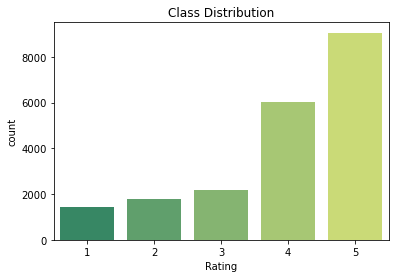

In [23]:
sns.countplot(x=df['Rating'],palette='summer')
plt.title('Class Distribution')
plt.show()
